# Analysis Report: Correlations of Gold Price and Crude Oil Price Among Major Economies (1983-2020)

### Author: **[Parth Ghinaiya](https://github.com/parth-ghinaiya)**

-----------------------------------------------------------------------------------------------------

## Introduction

In this report, we will explore the correlation between gold and crude oil prices. We have a dataset containing the prices of crude oil and gold from 1983 to 2020. Our objective is to analyze the correlation between these two commodities on a yearly basis.

Understanding the relationship between gold and crude oil prices can provide valuable insights for investors and market analysts. By examining the correlation, we can identify any patterns or trends that may exist and make informed decisions based on this analysis.

Let's dive into the data and explore the correlation between the rates of gold price and crude oil price for each year.


## Dataset Overview

In this project, we are working with these two datasets of kaggle:


**Datasource 1: Crude Oil Price**
- Metadata URL: [Crude Oil Price Metadata](https://www.kaggle.com/datasets/sc231997/crude-oil-price)
- Data URL: [Crude Oil Price Data](https://www.kaggle.com/datasets/sc231997/crude-oil-price/download?datasetVersionNumber=31)
- Data Type: CSV

**Datasource 2: Gold Price**
- Metadata URL: [Gold Prices Metadata](https://www.kaggle.com/datasets/odins0n/monthly-gold-prices)
- Data URL: [Gold Prices Data](https://www.kaggle.com/datasets/odins0n/monthly-gold-prices/download?datasetVersionNumber=4)
- Data Type: CSV


## Overview

**Steps:**
1. Data preparation: Installing dependencies, importing libraries, and loading data from a SQLite database.
2. Preprocessing data: Calculating the average yearly prices for gold and crude oil.
3. Visualizing data: Creating bar and line charts to visualize the average yearly prices.
4. Calculating correlation: Computing the correlation coefficient between gold and crude oil prices.
5. Conclusion: Summarizing the findings and suggesting further analysis.

## Preparation

### Install Dependencies

In [146]:
%pip install --upgrade pip
%pip install matplotlib==3.8.2
%pip install numpy==1.26.3
%pip install pandas==1.5.3
%pip install SQLAlchemy==1.4.46
%pip install kaggle==1.5.16

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Dependencies

In [147]:
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

In [148]:
# Run datapipeline to create database if it doesn't exist
subprocess.run(["./pipeline.sh"])

CompletedProcess(args=['./pipeline.sh'], returncode=0)

### Retrieve Data from Database

In [149]:
# Load data from database
crude_oil_price_db_engine = create_engine('sqlite:///../data/crude_oil_price.sqlite')
gold_price_db_engine = create_engine('sqlite:///../data/gold_price.sqlite')

# Create dataframe from database
crude_oil_price_df = pd.read_sql_table('crude_oil_price', crude_oil_price_db_engine)
gold_price_df = pd.read_sql_table('gold_price', gold_price_db_engine)

## Preprocess Data

In [150]:
# restore date with pandas datetime
crude_oil_price_df['date'] = pd.to_datetime(crude_oil_price_df['date'], format='%Y-%m-%d')
gold_price_df['date'] = pd.to_datetime(gold_price_df['Date'], format='%Y-%m-%d')

# Extract year from the date for grouping
crude_oil_price_df['year'] = crude_oil_price_df['date'].dt.to_period('Y').dt.year
gold_price_df['year'] = gold_price_df['date'].dt.to_period('M').dt.year

# only take data between year 1983 to 2020 
crude_oil_price_df = crude_oil_price_df[crude_oil_price_df['year'] >= 1983]
crude_oil_price_df = crude_oil_price_df[crude_oil_price_df['year'] <= 2020]

gold_price_df = gold_price_df[gold_price_df['year'] >= 1983]
gold_price_df = gold_price_df[gold_price_df['year'] <= 2020]

# Group by YearMonth and calculate the mean price
oil_yearly_avg = crude_oil_price_df.groupby('year')['price'].mean()
gold_yearly_avg = gold_price_df.groupby('year')['United States(USD)'].mean()

In [151]:
# list out columns
print(f"Crude Oil Price Columns: {crude_oil_price_df.columns}")
print(f"Gold Price Columns: {gold_price_df.columns}")



Crude Oil Price Columns: Index(['date', 'price', 'percentChange', 'change', 'year'], dtype='object')
Gold Price Columns: Index(['Date', 'United States(USD)', 'Europe(EUR)', 'Japan(JPY)',
       'United Kingdom(GBP)', 'Canada(CAD)', 'Switzerland(CHF)', 'India(INR)',
       'China(CNY)', 'Turkey(TRY)', 'Saudi Arabia(SAR)', 'Indonesia(IDR)',
       'United Arab Emirates(AED)', 'Thailand(THB)', 'Vietnam(VND)',
       'Egypt(EGP)', 'South Korean(KRW)', 'Australia(AUD)',
       'South Africa(ZAR)', 'date', 'year'],
      dtype='object')


## Visualize Data  

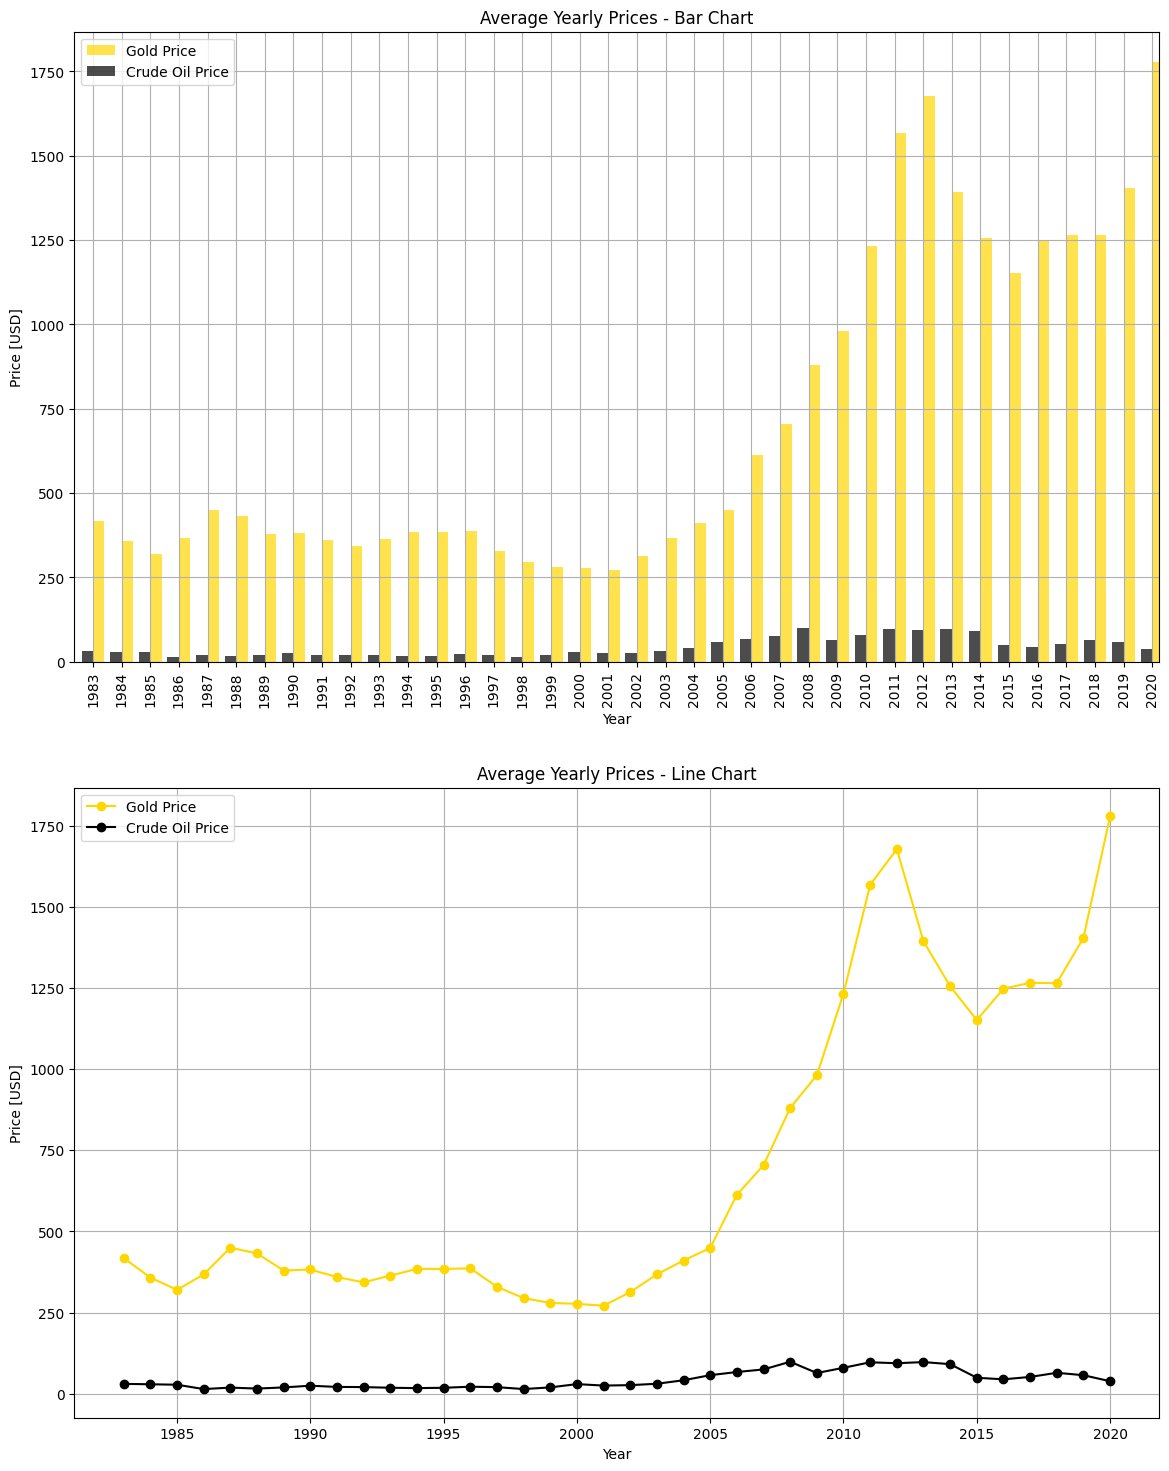

In [152]:
# Creating subplots with bar and line charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 18))

# Bar chart
gold_yearly_avg.plot(kind='bar', color='gold', alpha=0.7, position=0, width=0.4, label='Gold Price', ax=ax1)
oil_yearly_avg.plot(kind='bar', color='black', alpha=0.7, position=1, width=0.4, label='Crude Oil Price', ax=ax1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Price [USD]')
ax1.set_title('Average Yearly Prices - Bar Chart')
ax1.legend()
ax1.grid(True)

# Line chart
ax2.plot(gold_yearly_avg.index, gold_yearly_avg.values, marker='o', linestyle='-', color='gold', label='Gold Price')
ax2.plot(oil_yearly_avg.index, oil_yearly_avg.values, marker='o', linestyle='-', color='black', label='Crude Oil Price')

ax2.set_xlabel('Year')
ax2.set_ylabel('Price [USD]')
ax2.set_title('Average Yearly Prices - Line Chart')
ax2.legend()
ax2.grid(True)


## Calculate correlation

Month wise correlation [US]: {1: 0.36, 2: 0.37, 3: 0.34, 4: 0.36, 5: 0.37, 6: 0.36, 7: 0.35, 8: 0.37, 9: 0.36, 10: 0.35, 11: 0.38, 12: 0.35}


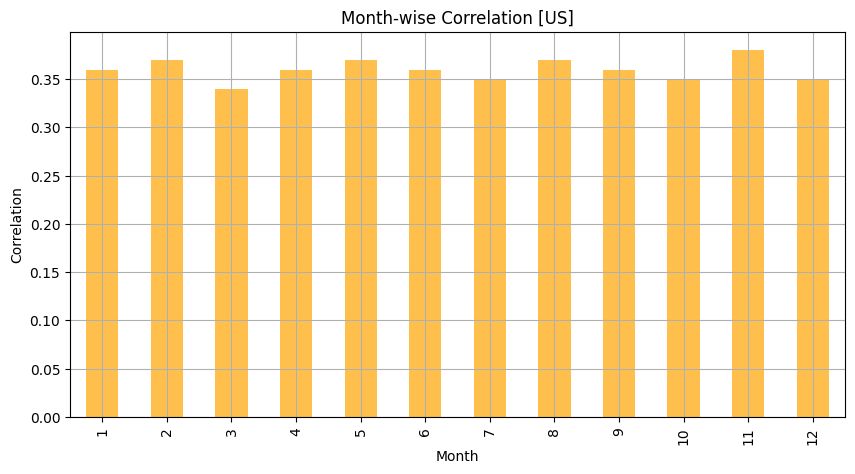

In [153]:
# Calculate month-wise correlation between gold and crude oil prices with 2f precision 
monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(
    gold_price_df['United States(USD)']).round(2)

# Convert month-wise correlation to dictionary
monthwise_correlation_dict = monthwise_correlation.to_dict()

print(f"Month wise correlation [US]: {monthwise_correlation_dict}")

# Plot month-wise correlation
fig, ax = plt.subplots(figsize=(10, 5))
monthwise_correlation.plot(kind='bar', color='orange', alpha=0.7, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Correlation')
ax.set_title('Month-wise Correlation [US]')
ax.grid(True)



In [154]:
# calculate overall correlation between gold and crude oil prices
correlation = crude_oil_price_df['price'].corr(gold_price_df['United States(USD)'])
print(f'Correlation between Gold Price and Crude Oil Price for US: {correlation: .2f}')

Correlation between Gold Price and Crude Oil Price for US:  0.36


## Check correlation between gold price and crude oil price for each country

In [155]:
# Calculate month-wise correlation between gold and crude oil prices with 2f precision for each country
us_monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(
    gold_price_df['United States(USD)']).round(2)
eur_monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(
    gold_price_df['Europe(EUR)']).round(2)
jpn_monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(
    gold_price_df['Japan(JPY)']).round(2)
ind_monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(
    gold_price_df['India(INR)']).round(2)
uk_monthwise_correlation = crude_oil_price_df.groupby(crude_oil_price_df['date'].dt.month)['price'].corr(
    gold_price_df['United Kingdom(GBP)']).round(2)

# Convert month-wise correlation to dictionary
us_monthwise_correlation_dict = us_monthwise_correlation.to_dict()
eur_monthwise_correlation_dict = eur_monthwise_correlation.to_dict()
jpn_monthwise_correlation_dict = jpn_monthwise_correlation.to_dict()
ind_monthwise_correlation_dict = ind_monthwise_correlation.to_dict()
uk_monthwise_correlation_dict = uk_monthwise_correlation.to_dict()

each_country_monthwise_correlation_dict = {
    'US': us_monthwise_correlation_dict,
    'EUR': eur_monthwise_correlation_dict,
    'JPN': jpn_monthwise_correlation_dict,
    'IND': ind_monthwise_correlation_dict,
    'UK': uk_monthwise_correlation_dict
}

print(f"Month wise correlation for each country")
for country, monthwise_correlation_dict in each_country_monthwise_correlation_dict.items():
    print(f"{country}: {monthwise_correlation_dict}")


Month wise correlation for each country
US: {1: 0.36, 2: 0.37, 3: 0.34, 4: 0.36, 5: 0.37, 6: 0.36, 7: 0.35, 8: 0.37, 9: 0.36, 10: 0.35, 11: 0.38, 12: 0.35}
EUR: {1: 0.32, 2: 0.32, 3: 0.28, 4: 0.31, 5: 0.32, 6: 0.31, 7: 0.29, 8: 0.31, 9: 0.3, 10: 0.3, 11: 0.32, 12: 0.32}
JPN: {1: 0.28, 2: 0.3, 3: 0.2, 4: 0.25, 5: 0.23, 6: 0.24, 7: 0.22, 8: 0.24, 9: 0.24, 10: 0.24, 11: 0.29, 12: 0.27}
IND: {1: 0.43, 2: 0.42, 3: 0.38, 4: 0.39, 5: 0.4, 6: 0.4, 7: 0.39, 8: 0.4, 9: 0.41, 10: 0.39, 11: 0.42, 12: 0.41}
UK: {1: 0.32, 2: 0.32, 3: 0.27, 4: 0.3, 5: 0.32, 6: 0.32, 7: 0.29, 8: 0.3, 9: 0.29, 10: 0.29, 11: 0.31, 12: 0.29}


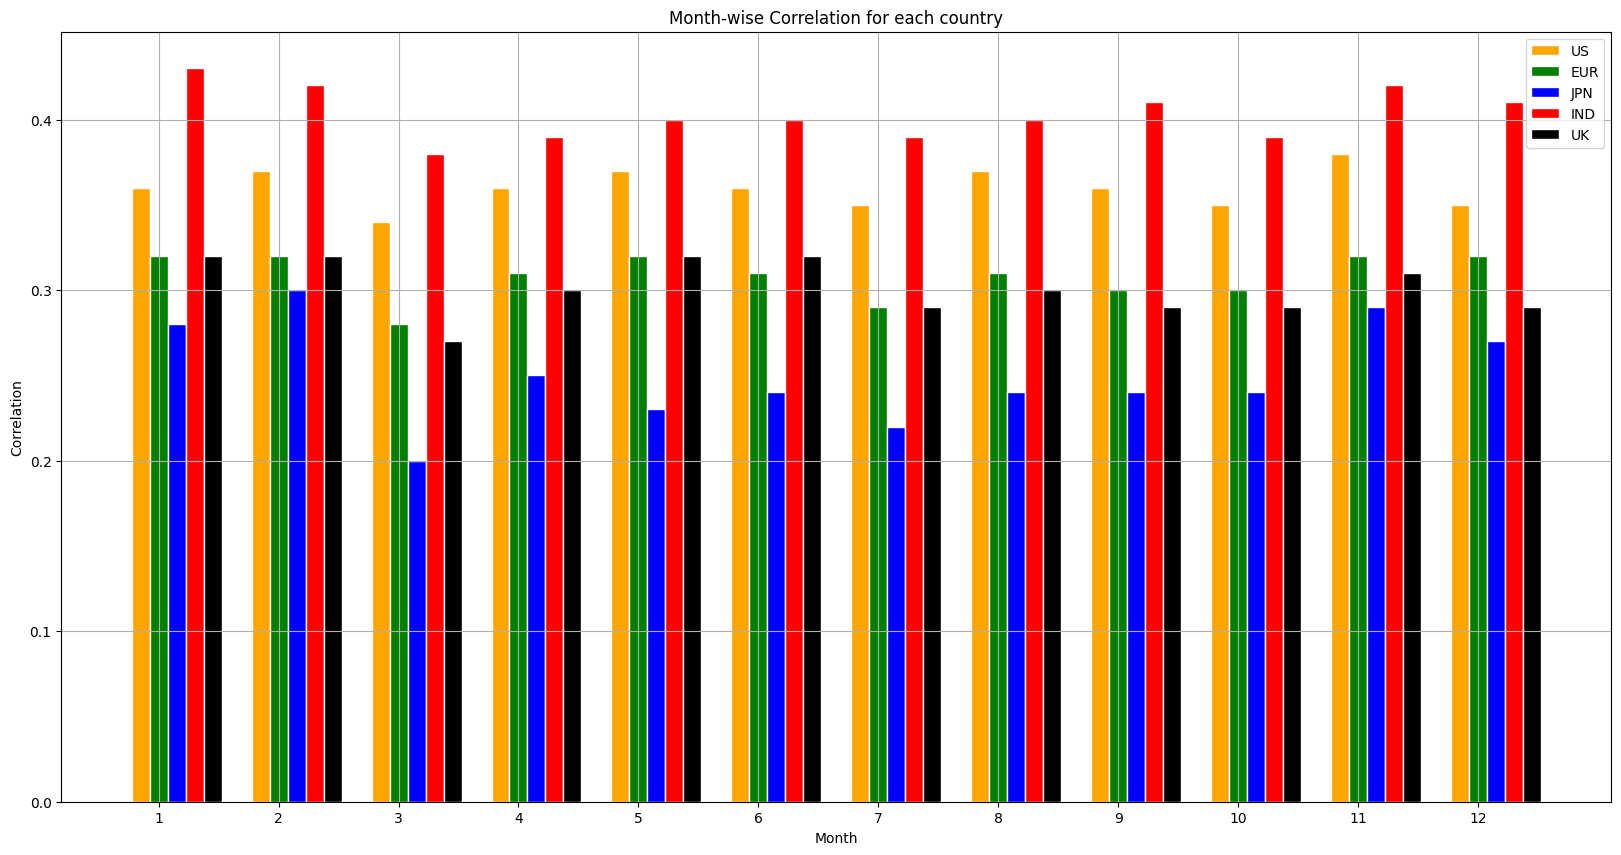

In [156]:
# Plot bar chart for month-wise correlation for each country in single plot with 2f precision and diff bars for each country
# provide space between bars for each month
bar_width = 0.15
# set position of bar on X axis
r1 = np.arange(len(us_monthwise_correlation))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Make the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(r1, us_monthwise_correlation.values, color='orange', width=bar_width, edgecolor='white', label='US')
ax.bar(r2, eur_monthwise_correlation.values, color='green', width=bar_width, edgecolor='white', label='EUR')
ax.bar(r3, jpn_monthwise_correlation.values, color='blue', width=bar_width, edgecolor='white', label='JPN')
ax.bar(r4, ind_monthwise_correlation.values, color='red', width=bar_width, edgecolor='white', label='IND')
ax.bar(r5, uk_monthwise_correlation.values, color='black', width=bar_width, edgecolor='white', label='UK')

# Add xticks on the middle of the group bars
ax.set_xlabel('Month')
ax.set_ylabel('Correlation')
ax.set_title('Month-wise Correlation for each country')
ax.set_xticks([r + bar_width for r in range(len(us_monthwise_correlation))])
ax.set_xticklabels(us_monthwise_correlation.index)
ax.legend()
ax.grid(True)


In [157]:
# fetch in month wise max correlation and month list for each country in dictionary
us_max_correlation_months = us_monthwise_correlation[
    us_monthwise_correlation == us_monthwise_correlation.max()].index.tolist()
eur_max_correlation_months = eur_monthwise_correlation[
    eur_monthwise_correlation == eur_monthwise_correlation.max()].index.tolist()
jpn_max_correlation_months = jpn_monthwise_correlation[
    jpn_monthwise_correlation == jpn_monthwise_correlation.max()].index.tolist()
ind_max_correlation_months = ind_monthwise_correlation[
    ind_monthwise_correlation == ind_monthwise_correlation.max()].index.tolist()
uk_max_correlation_months = uk_monthwise_correlation[
    uk_monthwise_correlation == uk_monthwise_correlation.max()].index.tolist()

monthwise_max_correlation = {
    'US': {
        'month': us_max_correlation_months,
        'correlation': us_monthwise_correlation.max()
    },
    'EUR': {
        'month': eur_max_correlation_months,
        'correlation': eur_monthwise_correlation.max()
    },
    'JPN': {
        'month': jpn_max_correlation_months,
        'correlation': jpn_monthwise_correlation.max()
    },
    'IND': {
        'month': ind_max_correlation_months,
        'correlation': ind_monthwise_correlation.max()
    },
    'UK': {
        'month': uk_max_correlation_months,
        'correlation': uk_monthwise_correlation.max()
    }
}

print(f"Month wise max correlation for each country")
for country, monthwise_max_correlation_dict in monthwise_max_correlation.items():
    print(f"{country}: {monthwise_max_correlation_dict}")


Month wise max correlation for each country
US: {'month': [11], 'correlation': 0.38}
EUR: {'month': [1, 2, 5, 11, 12], 'correlation': 0.32}
JPN: {'month': [2], 'correlation': 0.3}
IND: {'month': [1], 'correlation': 0.43}
UK: {'month': [1, 2, 5, 6], 'correlation': 0.32}


Average correlation for all countries:  0.32
Overall correlation for each country
US:  0.36
EUR:  0.31
JPN:  0.25
IND:  0.40
UK:  0.30


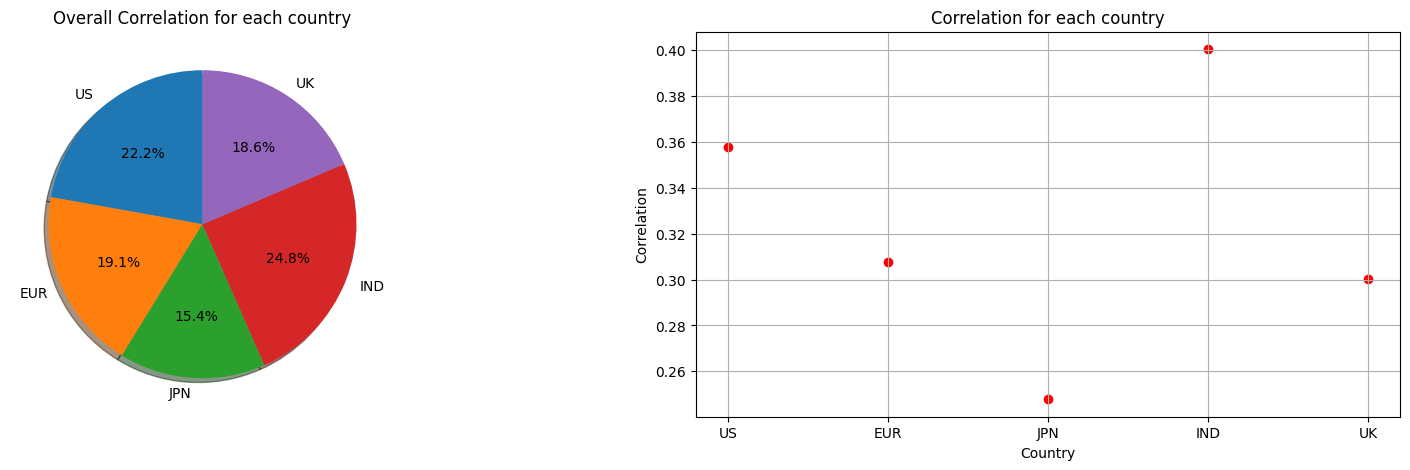

In [158]:
# Calculate overall correlation between gold and crude oil prices for each country
us_correlation = crude_oil_price_df['price'].corr(gold_price_df['United States(USD)'])
eur_correlation = crude_oil_price_df['price'].corr(gold_price_df['Europe(EUR)'])
jpn_correlation = crude_oil_price_df['price'].corr(gold_price_df['Japan(JPY)'])
ind_correlation = crude_oil_price_df['price'].corr(gold_price_df['India(INR)'])
uk_correlation = crude_oil_price_df['price'].corr(gold_price_df['United Kingdom(GBP)'])

correlation_dict = {
    'US': us_correlation,
    'EUR': eur_correlation,
    'JPN': jpn_correlation,
    'IND': ind_correlation,
    'UK': uk_correlation
}

print(f"Average correlation for all countries: {sum(correlation_dict.values()) / len(correlation_dict.values()): .2f}")
print(f"Overall correlation for each country")
for country, correlation in correlation_dict.items():
    print(f"{country}: {correlation: .2f}")

# plot pie and scatter plot for correlation for each country in single plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Pie chart
ax1.pie(correlation_dict.values(), labels=correlation_dict.keys(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Overall Correlation for each country')

# Scatter plot
ax2.scatter(correlation_dict.keys(), correlation_dict.values(), color='red')
ax2.set_xlabel('Country')
ax2.set_ylabel('Correlation')
ax2.set_title('Correlation for each country')
ax2.grid(True)

## Conclusion and Further Analysis

Based on the analysis performed, we can conclude that there is a moderate positive correlation (0.32) overall, and the monthly correlations between crude oil and gold prices hover consistently around 0.20 to 0.43. This suggests that there is some tendency for both prices to move in the same direction, although not consistently. It is important to note that the correlation is not very strong, but it is not negligible either.

## Overall Trends

### Consistent Correlations
- The US, Eurozone (EUR), Japan (JPN), India (IND), and the UK exhibit relatively consistent correlations throughout the year. They all hover around the mid-0.3s to mid-0.4s range.

### Seasonal Fluctuations
- There might be some seasonal patterns in these correlations, especially in the US and EUR, where the correlation tends to be slightly higher in the early and later months of the year (January, May, September, October, November).

## Country-Specific Observations

### Japan (JPN)
- Japan consistently maintains relatively higher correlations compared to other countries throughout the year, especially from August to November.

### India (IND)
- India's correlations are also notably high, particularly from January to October.

### US vs. Eurozone
- The US and Eurozone show similar patterns but with slight variations. The US tends to have slightly higher correlations from February to July, while the Eurozone's higher correlations are more dispersed throughout the year.

## Possible Implications

### Market Interdependencies
- Higher correlations might suggest stronger interdependencies between these countries' economies or financial markets during certain periods. Factors like global economic trends, trade relationships, or policy changes could contribute to these patterns.

### Seasonal Economic Activities
- The fluctuating correlations could potentially align with specific economic activities or events that vary throughout the year, such as holiday seasons, fiscal year ends, or policy shifts.

### Policy and Global Events
- Anomalies or shifts in correlations might be linked to significant global events, such as economic policy changes, geopolitical tensions, or global financial crises, which may impact international markets differently.

## Summary

The consistent correlations suggest some level of ongoing economic or financial interdependence between these major economies. Understanding the drivers behind these correlations could provide valuable insights into the dynamics of global markets and potentially aid in forecasting or risk assessment for investors and policymakers.

This data forms a foundation for deeper analysis, potentially involving additional economic indicators, events, or macroeconomic factors to paint a more comprehensive picture of the global economic landscape during this period.
